<h1>Aravinth R<br>19MIC0053<br>Lab Experiment 3

<h1>Question 1

<h1>The Linear Regression Technique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as p1
from sklearn import linear_model

In [2]:
data=pd.read_csv("/Users/aravinth/Desktop/Data Warehousing/Assignment 3/CovidActiveCases.csv")

#reference = https://www.worldometers.info/coronavirus/country/india/

In [3]:
print(data)

    Number   Month  ActiveCases
0        1  Feb 20            0
1        2  Mar 20         1238
2        3  Apr 20        24639
3        4  May 20        93331
4        5  Jun 20       220493
5        6  Jul 20       564637
6        7  Aug 20       784620
7        8  Sep 20       940894
8        9  Oct 20       570736
9       10  Nov 20       436078
10      11  Dec 20       254507
11      12  Jan 21       169112
12      13  Feb 21       169172
13      14  Mar 21       584067
14      15  Apr 21      3270089
15      16  May 21      1885874
16      17  Jun 21       524747
17      18  Jul 21       417327


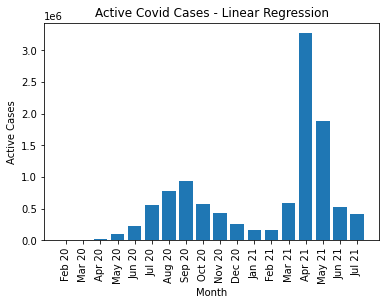

In [4]:
x=data.Month
y=data.ActiveCases
p1.title('Active Covid Cases - Linear Regression')
p1.xlabel('Month')
p1.ylabel('Active Cases')
x1 = np.arange(len(x))
p1.bar(x1,y)
p1.xticks(x1,x,color='Black',rotation=90)
p1.show()

<h1>Prediction for JAN22

In [5]:
l=linear_model.LinearRegression()
l.fit(data[['Number']],data.ActiveCases)
print("Active Case count in JAN2022 will be",(l.predict([[24]]))) 
print("Round off",np.ceil(l.predict([[24]])))



Active Case count in JAN2022 will be [1643496.09494324]
Round off [1643497.]


In [6]:
print(l.coef_)

[71537.81114551]


In [7]:
print(l.intercept_)

-73411.37254901929


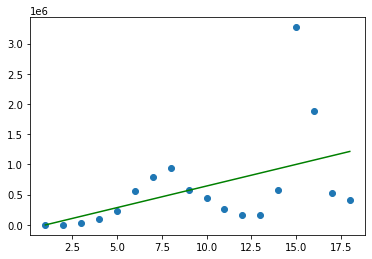

In [8]:
slope=l.coef_
intercept=l.intercept_
s=data.Number
d=data.ActiveCases
p1.scatter(s,d)
p1.plot(s,slope*s+intercept,color='g')
p1.show()


<h1>Question 2

<h1>Decision Tree Algorithm

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [10]:
roaddata=pd.read_csv("/Users/aravinth/Desktop/Data Warehousing/Assignment 3/RoadData.csv")
print(roaddata)

    Road_ID  Length Number_of_bends Traffic_Volume Accident_Risk
0         1  Medium            Less            Low            No
1         2   Short            More            Low           Yes
2         3  Medium            Less         Medium            No
3         4    Long            More            Low            No
4         5  Medium            Less           High            No
5         6    Long            More         Medium           Yes
6         7    Long            More            Low           Yes
7         8  Medium            Less           High            No
8         9  Medium            Less         Medium           Yes
9        10    Long            More            Low            No
10       11    Long            Less            Low            No
11       12  Medium            More            Low            No
12       13  Medium            Less           High           Yes
13       14   Short            More           High           Yes
14       15    Long      

In [11]:
y={'Low':0,'Medium':1,'High':2}
roaddata['Traffic_Volume']=roaddata['Traffic_Volume'].map(y)
print(roaddata)

    Road_ID  Length Number_of_bends  Traffic_Volume Accident_Risk
0         1  Medium            Less               0            No
1         2   Short            More               0           Yes
2         3  Medium            Less               1            No
3         4    Long            More               0            No
4         5  Medium            Less               2            No
5         6    Long            More               1           Yes
6         7    Long            More               0           Yes
7         8  Medium            Less               2            No
8         9  Medium            Less               1           Yes
9        10    Long            More               0            No
10       11    Long            Less               0            No
11       12  Medium            More               0            No
12       13  Medium            Less               2           Yes
13       14   Short            More               2           Yes
14       1

In [12]:
c={'Short':0,'Medium':1,'Long':2}
roaddata['Length']=roaddata['Length'].map(c)
print(roaddata)

    Road_ID  Length Number_of_bends  Traffic_Volume Accident_Risk
0         1       1            Less               0            No
1         2       0            More               0           Yes
2         3       1            Less               1            No
3         4       2            More               0            No
4         5       1            Less               2            No
5         6       2            More               1           Yes
6         7       2            More               0           Yes
7         8       1            Less               2            No
8         9       1            Less               1           Yes
9        10       2            More               0            No
10       11       2            Less               0            No
11       12       1            More               0            No
12       13       1            Less               2           Yes
13       14       0            More               2           Yes
14       1

In [13]:
t={'Less':0,'More':1}
roaddata['Number_of_bends']=roaddata['Number_of_bends'].map(t)
print(roaddata)

    Road_ID  Length  Number_of_bends  Traffic_Volume Accident_Risk
0         1       1                0               0            No
1         2       0                1               0           Yes
2         3       1                0               1            No
3         4       2                1               0            No
4         5       1                0               2            No
5         6       2                1               1           Yes
6         7       2                1               0           Yes
7         8       1                0               2            No
8         9       1                0               1           Yes
9        10       2                1               0            No
10       11       2                0               0            No
11       12       1                1               0            No
12       13       1                0               2           Yes
13       14       0                1               2          

<h1>Training Dataset

In [14]:
train=['Length','Number_of_bends','Traffic_Volume']
x=roaddata[train]
y=roaddata['Accident_Risk']
print(x)
print(y)


    Length  Number_of_bends  Traffic_Volume
0        1                0               0
1        0                1               0
2        1                0               1
3        2                1               0
4        1                0               2
5        2                1               1
6        2                1               0
7        1                0               2
8        1                0               1
9        2                1               0
10       2                0               0
11       1                1               0
12       1                0               2
13       0                1               2
14       2                1               1
15       1                0               0
16       0                0               1
17       1                1               0
18       2                0               1
19       1                1               0
20       2                0               2
21       2                1     

In [15]:
d1=DecisionTreeClassifier()
d1=d1.fit(x,y)

<h1>Prediction for Accident Risk

In [16]:
z=d1.predict([[0,1,1]])
print(z)

['Yes']


In [17]:

z1=d1.predict([[2,0,1]])
print(z1)

['No']


In [18]:
z2=d1.predict([[2,0,2]])
print(z2)

['Yes']


[Text(115.8923076923077, 199.32, 'X[0] <= 0.5\ngini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(90.13846153846154, 163.07999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(141.64615384615385, 163.07999999999998, 'X[2] <= 0.5\ngini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(51.50769230769231, 126.83999999999999, 'X[1] <= 0.5\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(77.26153846153846, 90.6, 'X[0] <= 1.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(51.50769230769231, 54.359999999999985, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(103.01538461538462, 54.359999999999985, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(231.7846153846154, 126.83999999999999, 'X[2] <= 1.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(180.27692307692308, 90.6, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(154.52307692307693, 54.359999999999985, 'X[0] <= 1.5\ngi

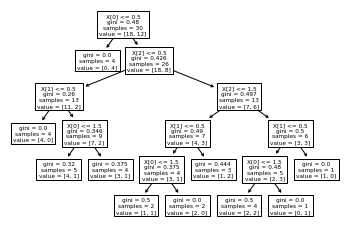

In [19]:
tree.plot_tree(d1)

<h1>Question 3

<h1>The Naïve Bayes Classification Algorithm

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
patientdata=pd.read_csv("/Users/aravinth/Desktop/Data Warehousing/Assignment 4/PatientData.csv")

In [22]:
label=preprocessing.LabelEncoder()
x=patientdata.iloc[:,[1,2,3]].values
y=patientdata.iloc[:,[-1]].values.flatten()
print(patientdata)

            Name  Gender  Weight   BMI    Condition Strict_Diet
0        Pranauv    Male      60  19.3      Healthy          No
1   Purusothaman    Male      63  18.0  Underweight         Yes
2          Shyam    Male      55  17.0  Underweight         Yes
3         Nithin    Male      80  28.0    Oveweight         Yes
4          Rohit    Male      70  22.0      Healthy          No
5       Aravinth    Male      50  17.5  Underweight         Yes
6         Barani    Male      60  20.0      Healthy          No
7        Niketha  Female      60  21.0      Healthy          No
8       Krithiik    Male      60  26.0    Oveweight         Yes
9     Kumaaravel    Male      80  27.0    Oveweight         Yes
10       Abishek    Male      85  26.5   Overweight         Yes
11        Aneesh    Male      90  32.0        Obese         Yes
12          Ajay    Male      70  23.0      Healthy          No
13          Babu    Male      53  19.2      Healthy          No
14     Dhiyanesh    Male      54  16.0  

In [23]:
x[:,0]=label.fit_transform(x[:,0])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [25]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [26]:
y_pred=classifier.predict(x_test)
print(y_pred)

['Yes' 'Yes' 'Yes' 'Yes' 'Yes']


In [27]:
con=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print("Confusion Matrix is")
print(con)
print("Accuracy Score is",acc)

Confusion Matrix is
[[0 2]
 [0 3]]
Accuracy Score is 0.6
